In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

0.7795048903133116

In [28]:
from sklearn.linear_model import LinearRegression
#from sklearn.datasets import load_boston
import pandas as pd

In [29]:
DATA_PATH = 'Inclusion_Financiera.csv'
data = pd.read_csv(DATA_PATH)

In [30]:
data.head()


,TIPO DE ENTIDAD,CODIGO DE LA ENTIDAD,NOMBRE DE LA ENTIDAD,FECHA DE CORTE,UNIDAD DE CAPTURA,DEPARTAMENTO,RENGLON,MUNICIPIO,TIPO,NRO CORRESPONSALES PROPIOS,...,NRO MICROCREDITO> 10SMMLV HASTA 25SMMLV,MONTO MICROCREDI> 10SMMLV HASTA 25SMMLV,NRO MICROCREDITO MUJERES,MONTO MICROCREDITO MUJERES,NRO MICROCREDITO HOMBRES,MONTO MICROCREDITO HOMBRES,NRO TOTAL MICROCREDITO,MONTO TOTAL MICROCREDITO,NRO PROD DEPOSITO NIVEL NACIONAL,MONTO PROD DEPOSITO NIVEL NACIONAL
0,1,39,Banco Davivienda,31/12/2017,1,ANTIOQUIA,847,URRAO,TRANS Y TRAMITES EN CORRESPONSALES,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
1,1,9,Citibank,31/12/2017,1,ANTIOQUIA,209,CONCORDIA,TRANS Y TRAMITES EN CORRESPONSALES,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,1,1,Banco De Bogota,31/12/2017,1,ANTIOQUIA,360,ITAGUI,CREDITO DE VIVIENDA,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
3,1,58,Coopcentral,31/12/2017,1,ANTIOQUIA,1,MEDELLIN,MICROCREDITO,0,...,0,0.0,0,0.0,1,29000000.0,1,29000000.0,0.0,0.0
4,1,52,Bancamía S.A.,31/12/2017,1,ANTIOQUIA,649,SAN CARLOS,CORRESPONSALES,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603232 entries, 0 to 603231
Data columns (total 87 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   TIPO DE ENTIDAD                           603232 non-null  int64  
 1   CODIGO DE LA  ENTIDAD                     603232 non-null  int64  
 2   NOMBRE DE LA  ENTIDAD                     603232 non-null  object 
 3   FECHA DE CORTE                            603232 non-null  object 
 4   UNIDAD DE CAPTURA                         603232 non-null  int64  
 5   DEPARTAMENTO                              603232 non-null  object 
 6   RENGLON                                   603232 non-null  int64  
 7   MUNICIPIO                                 603232 non-null  object 
 8   TIPO                                      598100 non-null  object 
 9   NRO CORRESPONSALES PROPIOS                603232 non-null  int64  
 10  NRO CORRESPONSALES T

In [32]:
columnaPagos = data['NRO PAGOS'] = data['NRO PAGOS'].astype(str)


In [33]:
#variablespredictoras
X = data.iloc[:,17:21]

#variable a predecir
Y = data.iloc[:,19]

#mostramos las 5 primeras filas
X.head()

,NRO GIROS RECIBIDOS,MONTO GIROS RECIBIDOS,NRO PAGOS,MONTO PAGOS
0,0,0,49.0,14862557.0
1,0,0,103.0,13944143.0
2,0,0,0.0,0.0
3,0,0,0.0,0.0
4,0,0,0.0,0.0


In [34]:
from sklearn.model_selection import train_test_split

#X_train y Y_train para entrenamiento
#Y_test y Y_test para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422262 entries, 359560 to 305711
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   NRO GIROS RECIBIDOS    422262 non-null  int64  
 1   MONTO GIROS RECIBIDOS  422262 non-null  int64  
 2   NRO PAGOS              422262 non-null  object 
 3   MONTO PAGOS            422262 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.1+ MB


In [36]:
#cargamos libreria Decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

#### Creamos el modelo del árbol de decisión

In [37]:
#Llamamos al constructor del arbol de decisión
arbol = DecisionTreeClassifier(max_depth=4)

In [38]:
#entramos al modelo
arbol_montoMicrocredito = arbol.fit(X_train, Y_train)

In [39]:
#Graficamos el árbol de decisión
## Notas: 
### Todas las flechas de lado izqueirdo pertenecen a la respuesta "verdadero" y las del derecho a las respuestas " Falso"ArithmeticError

from matplotlib import pyplot as pyplot
from sklearn import tree


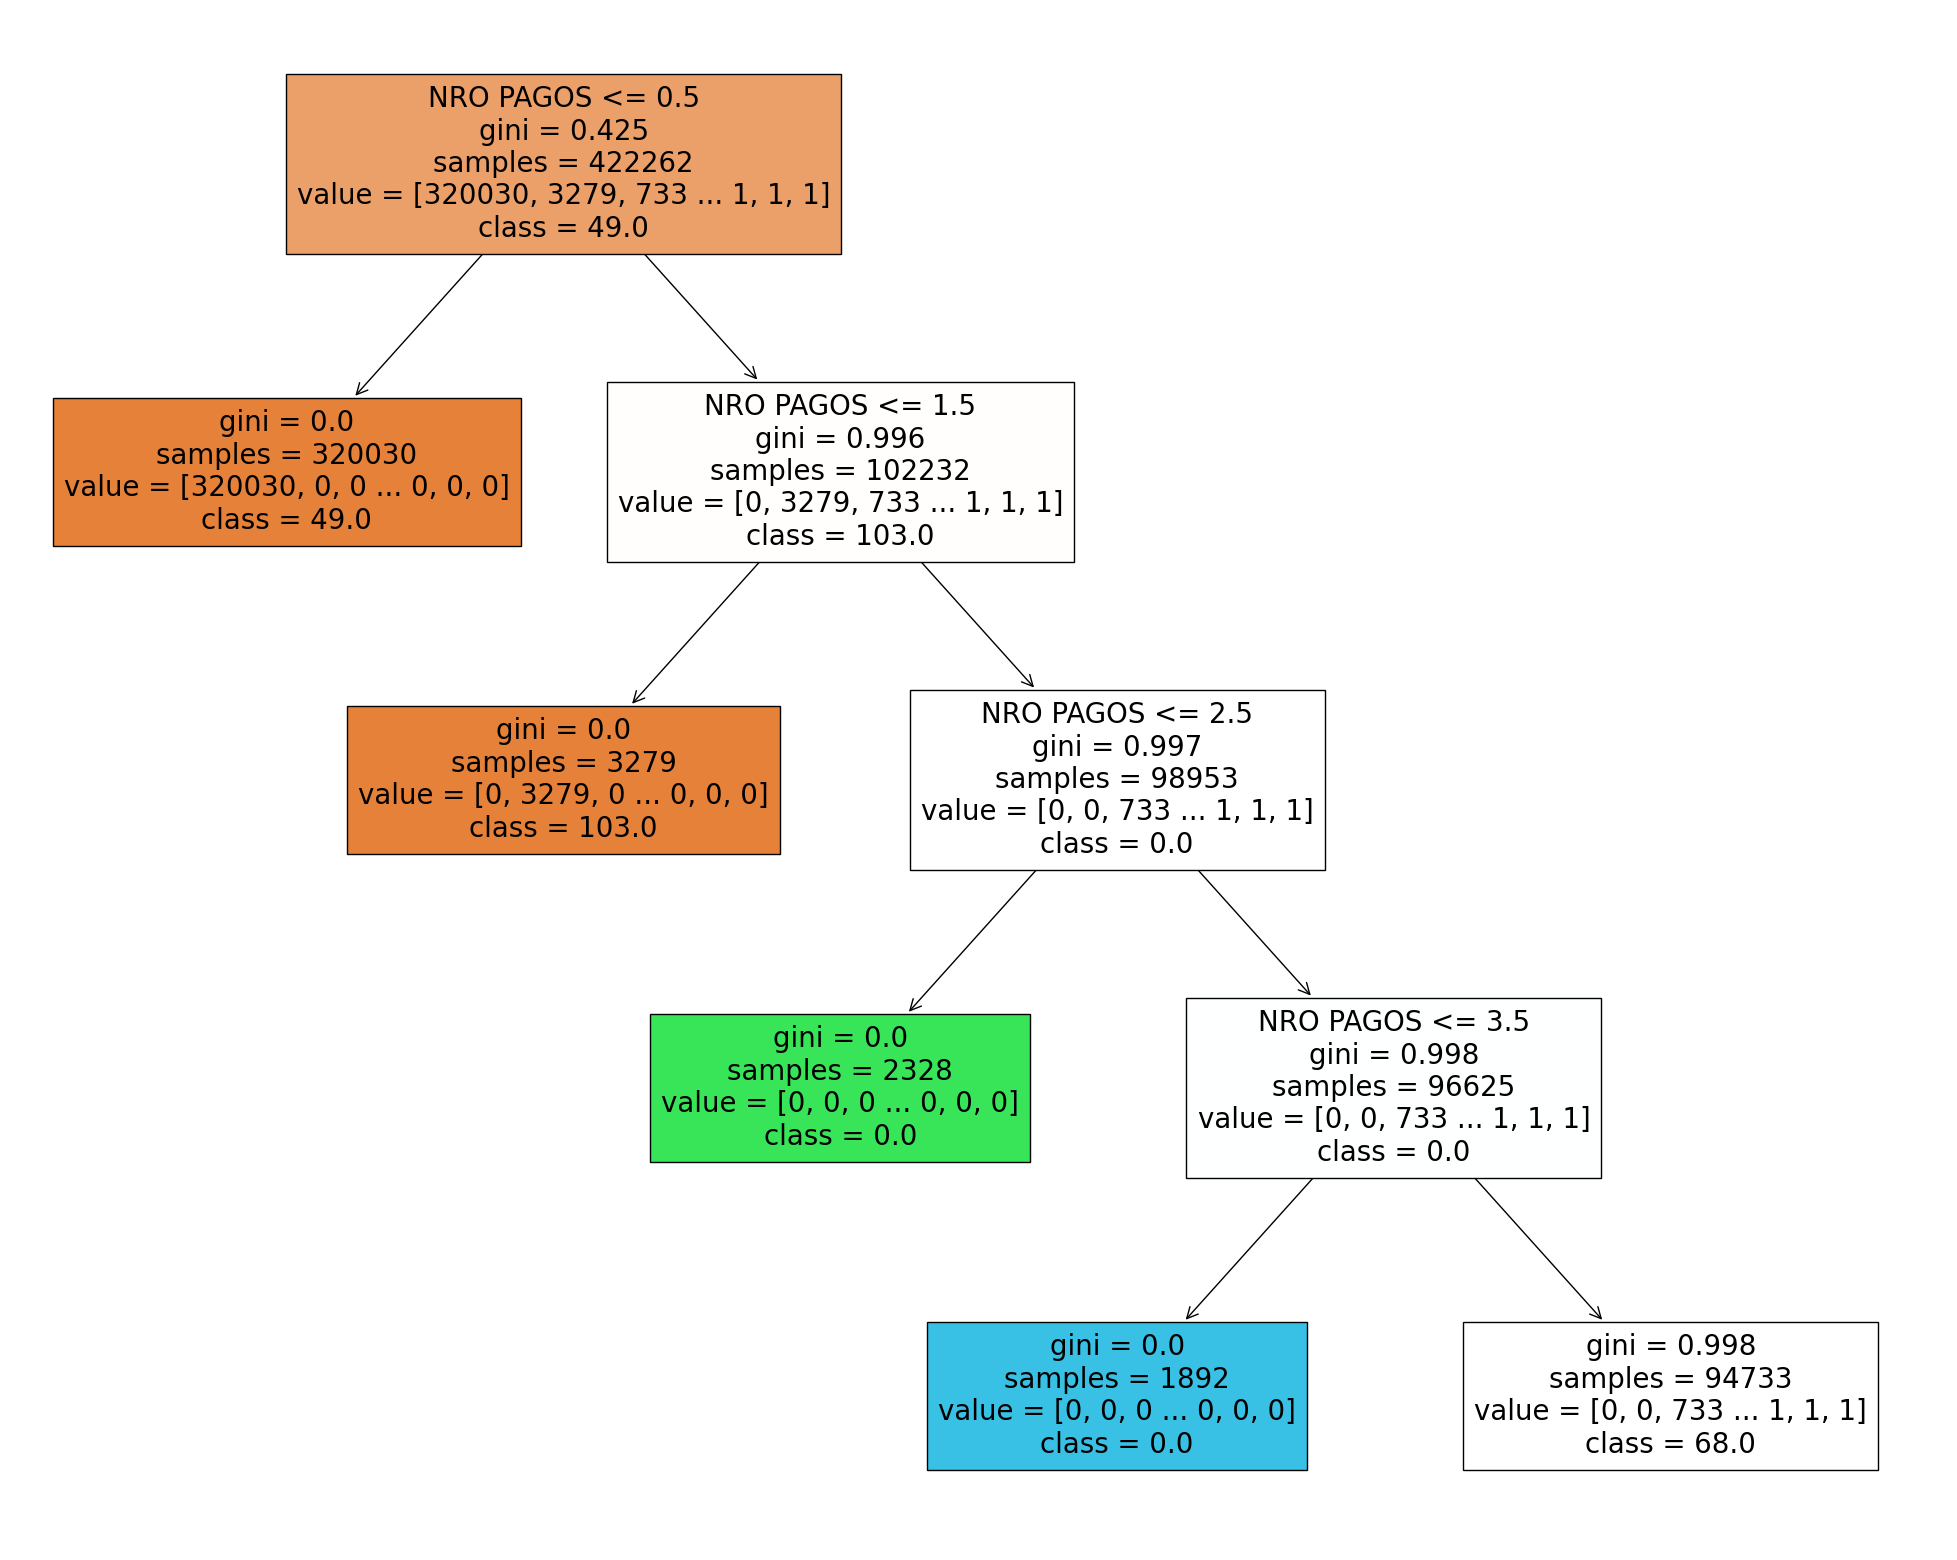

In [40]:
fig = plt.figure(figsize=(25,20))

tree.plot_tree(arbol_montoMicrocredito, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)

plt.show()

In [41]:
#guardamos el grafico
fig.savefig("arbol de decision.png")

In [42]:
#ejecutar la predicción  con los datos contenidos en la tabla testing

Y_pred = arbol_montoMicrocredito.predict(X_test)


In [43]:
#muestreme las etiquetas que asigno a la predicción
Y_pred

array(['0.0', '0.0', '4.0', ..., '0.0', '4.0', '4.0'], dtype=object)

In [44]:
#calcular la precisión del modelo creando una matriz de cnfusión
from sklearn.metrics import confusion_matrix

Matriz_de_confusion= confusion_matrix(Y_test, Y_pred)

#Matriz_de_confusion


In [45]:
#calculamos la precisión del modelo

import numpy as np

precision_global = np.sum(Matriz_de_confusion.diagonal())/ np.sum(Matriz_de_confusion)
precision_global

0.7795048903133116

In [46]:
#Calculamos la precisión por cada clase para saber si el modelo es bueno
precision_No = ((Matriz_de_confusion[0,0]))/sum(Matriz_de_confusion[0,])
precision_No

1.0

In [47]:
precision_Si = ((Matriz_de_confusion[1,1]))/sum(Matriz_de_confusion[1,])
precision_Si

1.0

### Conclusión

En conclusión, la matriz de confusión obtenida a partir de la base de datos de usuarios de la población colombiana muestra una clara relación entre el nivel de bancarización y la efectividad en los cobros y recuperación de cartera bancaria. Los resultados indican que, a medida que aumenta la accesibilidad a los bancos y el nivel de bancarización de los usuarios, se observa un aumento en los montos y tickets de cobro, lo que sugiere una mayor eficiencia en la gestión de pagos y una menor probabilidad de incumplimiento de los usuarios. Por lo tanto, estos hallazgos pueden ser útiles para los bancos y otras instituciones financieras en Colombia para diseñar estrategias que fomenten la bancarización y mejoren la gestión de cobros y recuperación de cartera. No obstante, es importante tener en cuenta que cualquier estrategia debe ser diseñada y aplicada con precaución, teniendo en cuenta las limitaciones de los datos y la complejidad del mercado financiero.

### Evaluación de modelos

### Evaluación de Overfitting o Underfitting:
En términos de overfitting (sobreajuste) o underfitting (subajuste), aquí hay algunas consideraciones:

- Overfitting: Si la profundidad máxima del árbol es demasiado grande (lo cual podría ser el caso si la profundidad máxima se establece en None por defecto), el modelo puede capturar el ruido en los datos y aprender relaciones específicas de los datos de entrenamiento que no se generalizarán bien en nuevos datos. Para evitar el overfitting, podrías considerar reducir la profundidad máxima del árbol o utilizar otros métodos de regularización.

- Underfitting: Si la profundidad máxima del árbol es demasiado pequeña, el modelo puede no ser lo suficientemente complejo como para capturar las relaciones en los datos. Esto podría llevar a un bajo rendimiento en el conjunto de prueba. Si notas que la precisión del modelo en el conjunto de prueba es significativamente baja, podría ser indicativo de underfitting.

### Mejoras Sugeridas:
- Ajuste de Hiperparámetros: Experimentar con diferentes valores para la profundidad máxima del árbol y otros hiperparámetros del modelo, como el criterio de división y la cantidad mínima de muestras requeridas para dividir un nodo. Esto ayudará a encontrar una configuración que equilibre el rendimiento y la generalización.

- Validación Cruzada: En lugar de confiar únicamente en la división de entrenamiento y prueba, considerar la posibilidad de utilizar la validación cruzada para evaluar el modelo en diferentes divisiones de los datos. Esto proporcionará una evaluación más robusta del rendimiento del modelo.

- Feature Engineering: Se podría explorar la posibilidad de utilizar más características o realizar transformaciones en las características existentes para mejorar la capacidad del modelo para capturar patrones.

- Otros Algoritmos: Además de los árboles de decisión, considerar probar otros algoritmos de clasificación como Random Forest, Support Vector Machines, o algoritmos de aprendizaje profundo, dependiendo de la naturaleza y el tamaño de los datos.

- Manejo de Datos Faltantes: Analizar cómo manejar los valores faltantes en los datos. En el código, menciono que la columna TIPO tiene valores faltantes. Dependiendo de la importancia de esta característica, podría eliminar las filas con valores faltantes, imputar los valores faltantes o considerar otras estrategias.

- Normalización de Características: Algunos algoritmos de clasificación, como los árboles de decisión, no requieren normalización de características. Sin embargo, para otros algoritmos, normalizar las características puede mejorar el rendimiento.

- Evaluación Detallada: Además de la precisión, considera evaluar el modelo utilizando otras métricas como la precisión, el recall, la F1-score y la curva ROC para obtener una imagen más completa del rendimiento del modelo.

Voy a utilizar las métricas de evaluación y observar cómo el modelo se comporta en los datos de entrenamiento y de prueba. Esta es la forma en la que lo puedo hacer y posibles formas de mejora:

1. Sobreajuste (Overfitting):

- Indicador: Si el rendimiento en los datos de entrenamiento es mucho mejor que en los datos de prueba, es una señal de sobreajuste.
- Métricas: El modelo tendrá un error bajo en los datos de entrenamiento (puede acercarse a cero) pero un error más alto en los datos de prueba.
- Acciones de Mejora:
    - Regularización: Probar con técnicas como regularización L1 o L2 (para modelos lineales) o ajustar los parámetros de regularización en modelos más complejos como árboles de decisión y bosques aleatorios.
    - Simplificación: Reducir la complejidad del modelo, disminuyendo la cantidad de características o la profundidad del árbol en árboles de decisión.
    - Validación Cruzada: Utilizar validación cruzada para evaluar el rendimiento del modelo en diferentes conjuntos de prueba y obtener una estimación más confiable del rendimiento.


2. Subajuste (Underfitting):

- Indicador: Si el rendimiento es bajo tanto en los datos de entrenamiento como en los de prueba, es probable que el modelo esté subajustando los datos.
- Métricas: El modelo tendrá un error relativamente alto tanto en los datos de entrenamiento como en los datos de prueba.
- Acciones de Mejora:
    - Mayor Complejidad: Aumentar la complejidad del modelo, permitiendo más grados de libertad (por ejemplo, aumenta la profundidad del árbol en árboles de decisión).
    - Agregar Características: Si se esta utilizando muy pocas características, considerar agregar más características relevantes para el problema.
    - Considera Otros Modelos: Si se esta utilizando un modelo simple como la regresión lineal, considerar probar modelos más complejos como árboles de decisión o modelos de ensamble.

3. Equilibrio: Si se encuentra un buen equilibrio entre el rendimiento en los datos de entrenamiento y prueba, es probable que se tenga un modelo bien ajustado.